# **Twitter Sentiment Analysis**

**Importing Libraries**

In [ ]:
#Data Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

**Reading and Extracting data from .csv files**

In [8]:
train_tweets = pd.read_csv("/content/drive/My Drive/Sentiment Analysis dataset/train.csv")
test_tweets = pd.read_csv("/content/drive/My Drive/Sentiment Analysis dataset/test.csv")

In [9]:
train_tweets.head()
#test_tweets.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
train_tweets = train_tweets[['label', 'tweet']]
test = test_tweets['tweet']

**Exploratory Data Analysis**

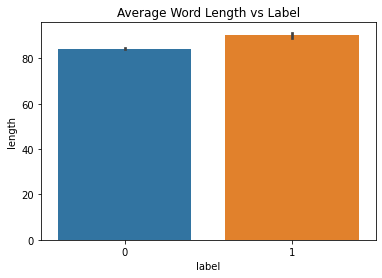

In [11]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig1 = sns.barplot('label', 'length', data = train_tweets)
plt.title("Average Word Length vs Label")
plot = fig1.get_figure()

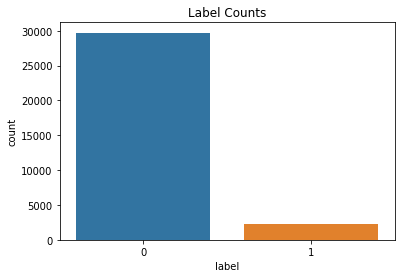

In [12]:
fig2 = sns.countplot(x="label", data=train_tweets)
plt.title("Label Counts")
plot = fig2.get_figure()

**Data preprocessing and Feature Engineering**

In [13]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
def text_processing(tweet):
    
    #Remoced hastags and other punctuations removed
    def form_sentence(tweet):
        tweet_blob = TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)

    #Removing stopwords and words with unusual symbols
    def no_user_alpha(tweet):
        tweet_list = [ele for ele in tweet.split() if ele != 'user']  #removes user
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)] #removes anything except string
        clean_s = ' '.join(clean_tokens) #created sentence from words
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')] #removed stop words
        return clean_mess
    no_punc_tweet = no_user_alpha(new_tweet)

    #Normalizing the words in tweets 
    def normalization(tweet_list):  #tweet_list contain words returned by no_user_alpha()
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v') #verb
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    final_process_tweet = normalization(no_punc_tweet)
    
    return final_process_tweet

In [15]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing)
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [16]:
train_tweets[train_tweets['label']==1].head()

,label,tweet,length,tweet_list
13,1,@user #cnn calls #michigan middle school 'buil...,74,"[cnn, call, michigan, middle, school, wall, ch..."
14,1,no comment! in #australia #opkillingbay #se...,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,retweet if you agree!,22,"[retweet, agree]"
23,1,@user @user lumpy says i am a . prove it lumpy.,47,"[lumpy, say, prove, lumpy]"
34,1,it's unbelievable that in the 21st century we'...,104,"[unbelievable, century, need, something, like,..."


**Vectorization and Model Selection**

In [17]:
X = train_tweets['tweet']
y = train_tweets['label']
test = test_tweets['tweet']

In [18]:
from sklearn.model_selection import train_test_split
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['label'], test_size=0.2)

In [19]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_processing)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_processing at 0x7f2c7840ad08>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

**Model Validation**

In [20]:
predictions = pipeline.predict(msg_test)

print(classification_report(predictions,label_test))
print ('\n')
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      6332
           1       0.14      1.00      0.24        61

    accuracy                           0.94      6393
   macro avg       0.57      0.97      0.60      6393
weighted avg       0.99      0.94      0.96      6393



[[5946  386]
 [   0   61]]
0.9396214609729392
